<a href="https://colab.research.google.com/github/yoojungsun0/uci-psych203/blob/main/PSYCH203B_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Load the data into your software package and select sessions 364 and above.


In [1]:
import pandas as pd
from urllib.request import Request, urlopen
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

url = "https://raw.githubusercontent.com/PerceptionCognitionLab/data2/master/out/morph1.dat"
url_request  = Request(url)
data = urlopen(url_request )
df = pd.read_table(data, header=0, sep=' ')
df.head(5)

,datID,sessionID,block,trial,background,target,forePeriod,resp,rt
0,1,360,0,0,0,1,32,0,1.262
1,2,360,0,1,0,8,31,0,0.934
2,3,360,0,2,0,9,35,1,0.604
3,4,360,0,3,0,0,31,0,0.617
4,5,360,0,4,0,7,31,0,0.486


In [2]:
df.tail(5)

,datID,sessionID,block,trial,background,target,forePeriod,resp,rt
5448,5450,376,6,11,1,7,34,1,0.283
5449,5451,376,6,12,1,6,31,1,0.310
5450,5452,376,6,13,0,3,35,1,0.253
5451,5453,376,6,14,1,1,32,0,0.167
5452,5454,376,6,15,1,5,37,1,0.258


In [3]:
# List of all sessions
df['sessionID'].unique()

array([360, 361, 362, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373,
       376])

In [4]:
# List of session 364 and above
df.drop(df.index[df['sessionID']<364],inplace=True)
sessionID = df['sessionID'].unique()
sessionID

array([364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 376])

In [5]:
# Number of participants that we will analyze for this assignment
len(sessionID)

11

In [6]:
# Mean-centering target and background
# df['target'] -= 4.5
# df['background'] -= 1/2

### 2. As a check, we expect all participants to react appropriately to the target. As the target level increases from more H-like (level 0) to more A-like (level 9), the probablity of an A response (coded 1) should increase. Visualize the data for each participant (each participant is a session) to see if all pass the check. One does not. Make a graph (or several graphs) to show the check and who passes. Based on this analysis, please exclude session 365 for the remainder of this exam.

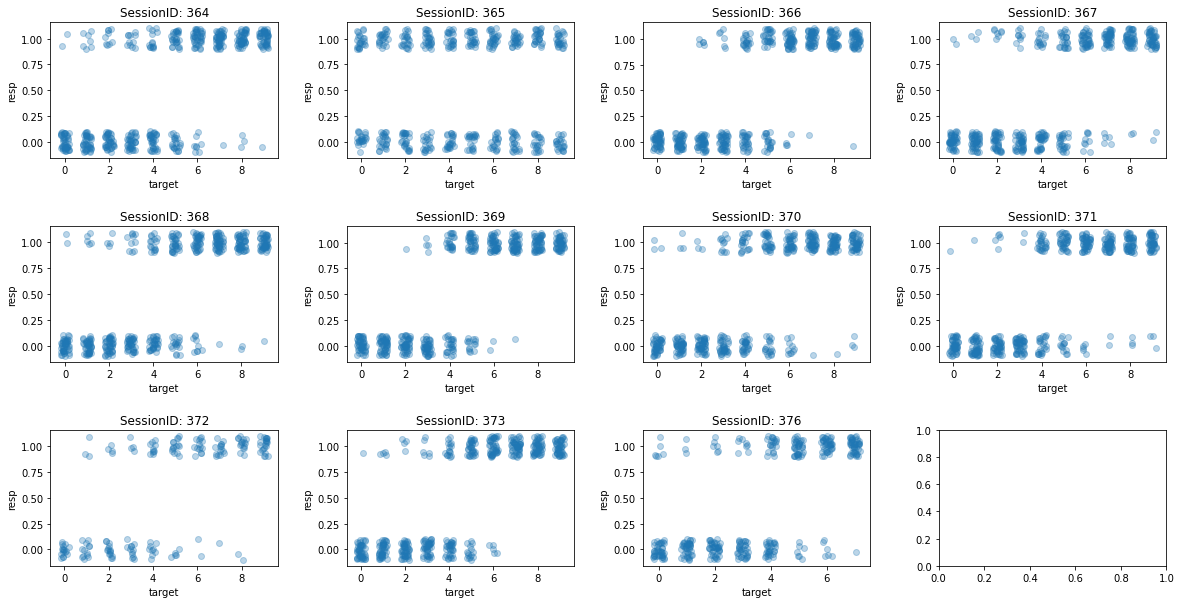

In [7]:
fig, axs = plt.subplots(3,4, figsize=(20,10), facecolor='w', edgecolor='k')
for i, ax in zip(range(len(sessionID)), axs.flat):
  curr = df.loc[df['sessionID'] == sessionID[i]]
  sns.regplot(x='target', 
              y='resp', 
              data=curr,
              fit_reg=False, # do not fit a regression line
              x_jitter=0.2, # could also dynamically set this with range of data
              y_jitter=0.1,
              scatter_kws={'alpha':0.3}, # set transparency
              ax=ax
              ) 
  ax.set_title('SessionID: {}'.format(sessionID[i]))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

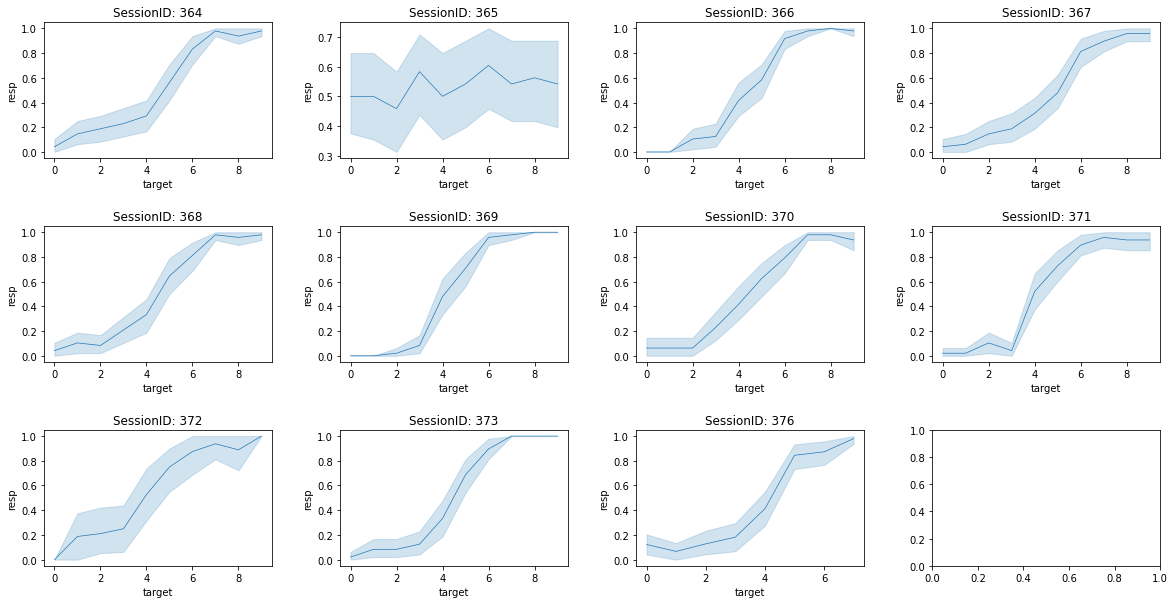

In [8]:
fig, axs = plt.subplots(3,4, figsize=(20,10), facecolor='w', edgecolor='k')
for i, ax in zip(range(len(sessionID)), axs.flat):
  # curr = df.loc[df['sessionID'] == sessionID[i]]
  sns.lineplot(data=df.loc[df['sessionID']==sessionID[i]], 
               x = 'target', 
               y='resp', 
               ax = ax, 
               linewidth=0.7)
  ax.set_title('SessionID: {}'.format(sessionID[i]))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

In [9]:
# Excluding session 365
df.drop(df.index[df['sessionID']==365],inplace=True)
df

,datID,sessionID,block,trial,background,target,forePeriod,resp,rt
577,578,364,0,0,1,3,31,0,0.515
578,579,364,0,1,0,6,31,1,0.574
579,580,364,0,2,0,4,31,1,0.572
580,581,364,0,3,1,1,32,0,0.506
581,582,364,0,4,0,1,35,1,0.625
...,...,...,...,...,...,...,...,...,...
5448,5450,376,6,11,1,7,34,1,0.283
5449,5451,376,6,12,1,6,31,1,0.310
5450,5452,376,6,13,0,3,35,1,0.253
5451,5453,376,6,14,1,1,32,0,0.167


In [10]:
sessionID = df['sessionID'].unique()
sessionID 
# We can see that 365 is excluded from the list

array([364, 366, 367, 368, 369, 370, 371, 372, 373, 376])

### 3. We are interested in the effect of background across the morph level. Make a graph that shows the data as a function of session, background, and target for each session. Add a mean line across sessions (participants). Try to make this a clear, informative graph that you might include in a publication. I like to use lighter colers or thinner lines for individual sessions.

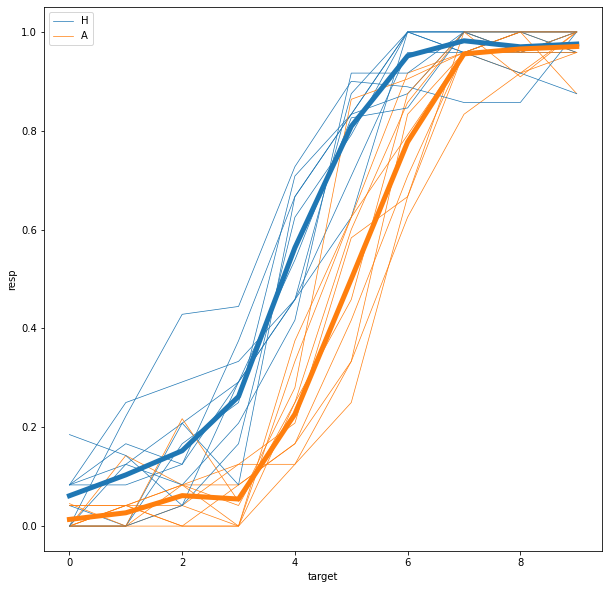

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
for sess in sessionID:
  sns.lineplot(data=df.loc[df['sessionID']==sess], x = 'target', y='resp', hue='background', ax = ax, legend=False, ci=None, linewidth=0.7)
sns.lineplot(data=df, x = 'target', y='resp', hue='background', ax = ax, linewidth=5, ci=None) # add ci or not?
plt.legend(labels=['H', 'A'])

### 4. Is there a background contrast effect for each individual. Write out a null model and an effects logistic-regression model. You can use binomial or bernoulli specifications.

Let $Y_{i}=0,1$ for the $i$th trial, $i = 1,...,N$. Let $x_{i}$ be the target or morph level on the $i$th trial ($x_{i} = -4.5, ..., 0, ..., 4.5$) and let $u_{i} = -1/2, 1/2$ be the background for H and A backgrounds, respectively.


1. Null model: \\
$Y_{i} \sim Bernoulli(p_{i})$ \\
$p_{i} = 1/(1 + exp(-q_{i}))$ \\
$q_{i} = \alpha + \beta x_{i}$      \\


2. Effects logistic-regression model: \\
$Y_{i} \sim Bernoulli(p_{i})$ \\
$p_{i} = 1/(1 + exp(-q_{i}))$ \\
$q_{i} = \alpha + \beta_{1}u_{i} + \beta_{2}x_{i}$         

### 5. Analyze whether a null or effects model is prefered for each individual.

The BIC statistic is calculated for logistic regression as follows (taken from “The Elements of Statistical Learning“):

BIC = -2 * LL + log(N) * k
Where log() has the base-e called the natural logarithm, LL is the log-likelihood of the model, N is the number of examples in the training dataset, and k is the number of parameters in the model.

The score as defined above is minimized, e.g. the model with the lowest BIC is selected.

In [12]:
def BIC(NLL, k, n): # k = cell mean params # number of observations
  bic = 2 * NLL + (k*np.log(n))
  return bic

In [13]:
def make_p(q):
  return 1 / (1+np.exp(-q))

def nll_null(par, x, y):
  q = par[0] + par[1]*x
  p = make_p(q)
  llvec = y*np.log(p) + (1-y)*np.log(1-p)
  return -np.sum(llvec)

def nll_effects(par, u, x, y):
  q = par[0] + par[1]*u + par[2]*x
  p = make_p(q)
  llvec = y*np.log(p) + (1-y)*np.log(1-p)
  return -np.sum(llvec)

def new_nll_null(par0,par1, x, y):
  q = par0 + par1*x
  p = make_p(q)
  llvec = y*np.log(p) + (1-y)*np.log(1-p)
  return -np.sum(llvec)

def new_nll_effects(par0,par1,par2, u, x, y):
  q = par0 + par1*u + par2*x
  p = make_p(q)
  llvec = y*np.log(p) + (1-y)*np.log(1-p)
  return -np.sum(llvec)

In [14]:
from scipy.optimize import curve_fit # This imports the curve fitting (parameter optimizing) function from scipy
import scipy
null_params=[]
effects_params=[]
prefer=[]
for sub in sessionID:
  curr = df.loc[df['sessionID'] == sub]
  u = scipy.array(curr['background']-1/2) # This centers background level around 0: [-0.5,  0.5]
  x = scipy.array(curr['target']-4.5) # This centers the target level around 0: [-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5]
  y = scipy.array(curr['resp'])
  

  popt_null, _ = curve_fit(nll_null, x,y)
  popt_effects, _ = curve_fit(nll_effects,scipy.array(curr['background'],curr['target']), y) 

  null_params.append(popt_null)
  effects_params.append(popt_effects)

  nll_null_value = new_nll_null(*popt_null, x, y)
  nll_effects_value = new_nll_effects(*popt_effects, u,x, y)


  bic_null = BIC(nll_null_value, 2, len(x))
  bic_effects = BIC(nll_effects_value, 3, len(x))

  if bic_effects < bic_null:
    print('Subject {} BIC score: {} for Null and {} for effects. Therefore, the effects model is preferred.'.format(sub, bic_null, bic_effects))
    prefer.append('effects')
  else:
    print('Subject {} BIC score: {} for Null and {} for effects. Therefore, the null model is preferred.'.format(sub, bic_null, bic_effects))
    prefer.append('null')


  

  

Subject 364 BIC score: 455.1866352762721 for Null and 502.9028195609199 for effects. Therefore, the null model is preferred.
Subject 366 BIC score: 282.6010585338395 for Null and 370.2857772330996 for effects. Therefore, the null model is preferred.
Subject 367 BIC score: 764.5410430266666 for Null and 379.5395576271445 for effects. Therefore, the effects model is preferred.
Subject 368 BIC score: 353.64747450458054 for Null and 412.99796119360843 for effects. Therefore, the null model is preferred.
Subject 369 BIC score: 216.44088663546154 for Null and 302.23672611229 for effects. Therefore, the null model is preferred.
Subject 370 BIC score: 370.7059630278242 for Null and 427.6219028305001 for effects. Therefore, the null model is preferred.
Subject 371 BIC score: 454.5349210493334 for Null and 359.0891338992553 for effects. Therefore, the effects model is preferred.
Subject 372 BIC score: 250.74600175762632 for Null and 153.92367596104725 for effects. Therefore, the effects model is

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8

### 6. The effects model has a few parameters. Using them, how would you characterize each individual’s contrast effect?

### 7. Can you visualize (make a plot) of how contrast effects vary across individuals?

In [18]:
df['target'] -= 4.5
df['background'] -= 0.5

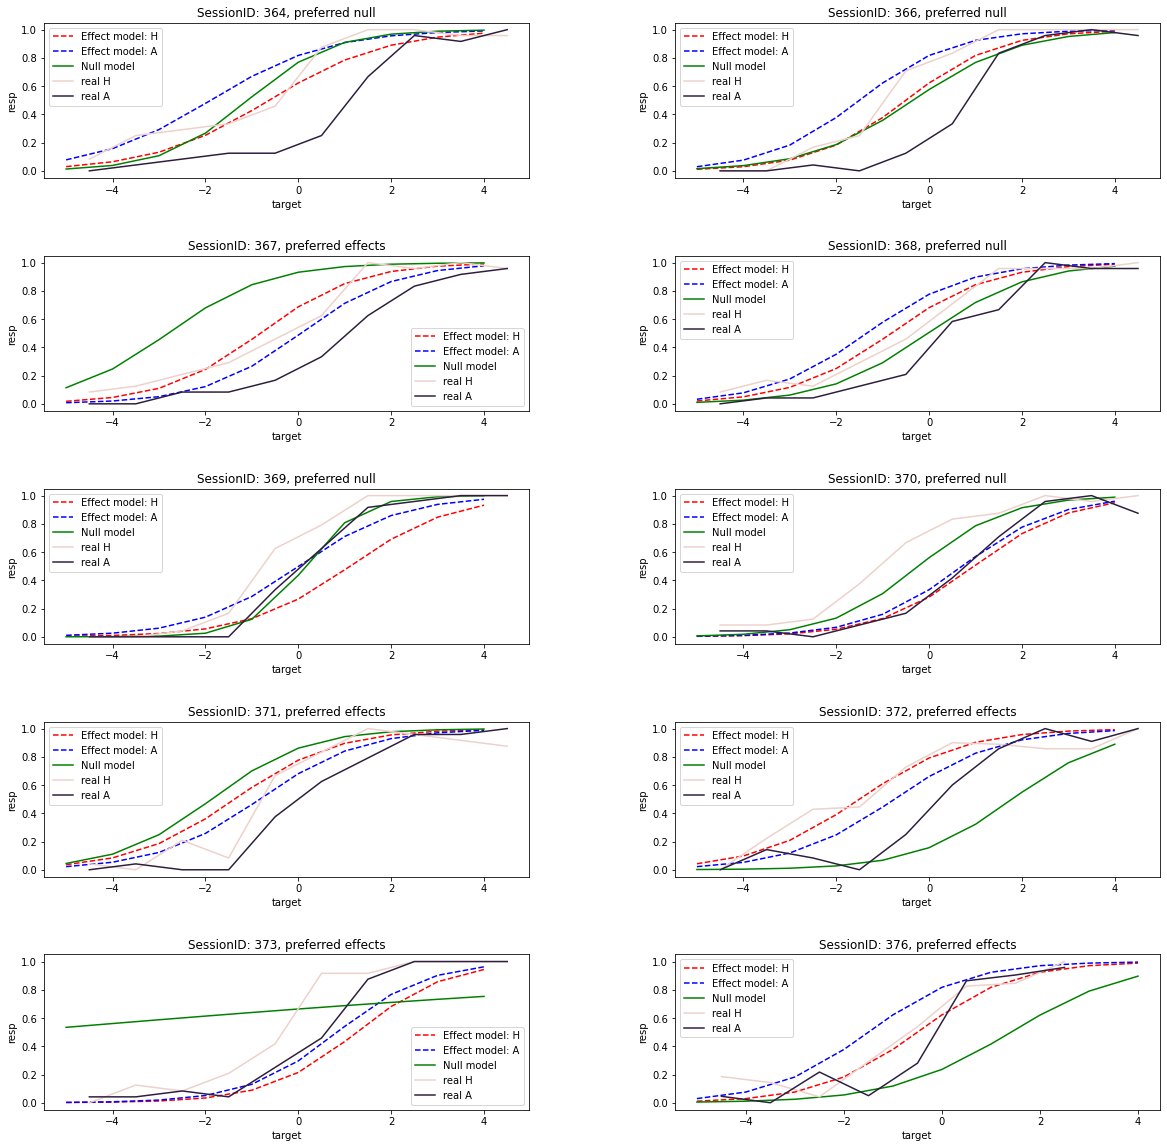

In [27]:
fig = plt.figure(figsize=(20,20))
def make_p(q):
  return 1 / (1+np.exp(-q))
def new_nll_null(par0,par1, x):
  q = par0 + par1*x
  p = make_p(q)
  return p
def new_nll_effects(par0,par1,par2, u, x):
  q = par0 + par1*u + par2*x
  p = make_p(q)
  return p

for i, ax in zip(range(len(sessionID)), axs.flat):
  curr = df.loc[df['sessionID'] == sessionID[i]]
  curr_param = effects_params[i]
  x = np.arange(-5,5)
  plt.subplot(5,2,i+1)
  plt.plot(x,new_nll_effects(curr_param[0],curr_param[1],curr_param[2],-1/2, x), 'r--')
  plt.plot(x,new_nll_effects(curr_param[0],curr_param[1],curr_param[2],1/2, x), 'b--')
  plt.plot(x,new_nll_null(null_params[i][0],null_params[i][1],x), 'g-')
  # sns.lineplot(data=curr, 
  #              x = 'target', 
  #              y='resp',legend=False, ci=None
  #              )

  sns.lineplot(data=curr, x = 'target', y='resp', hue='background', legend=False, ci=None)
  plt.title('SessionID: {}, preferred {}'.format(sessionID[i], prefer[i]))
  plt.legend(('Effect model: H', 'Effect model: A', 'Null model', 'real H', 'real A'))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

In [16]:
# def hue_regplot(data, x, y, hue, palette=None, **kwargs):
#     from matplotlib.cm import get_cmap
    
#     regplots = []
    
#     levels = data[hue].unique()
    
#     if palette is None:
#         default_colors = get_cmap('tab10')
#         palette = {k: default_colors(i) for i, k in enumerate(levels)}
    
#     for key in levels:
#         regplots.append(
#             sns.regplot(
#                 x=x,
#                 y=y,
#                 data=data[data[hue] == key],
#                 color=palette[key],
#                 **kwargs
#             )
#         )
    
#     return regplots

In [17]:
# fig, axs = plt.subplots(3,4, figsize=(20,10), facecolor='w', edgecolor='k')
# for i, ax in zip(range(len(sessionID)), axs.flat):
#   curr = df.loc[df['sessionID'] == sessionID[i]]
#   hue_regplot(x='target', 
#               y='resp', 
#               hue='background',
#               data=curr,
#               fit_reg=False, # do not fit a regression line
#               x_jitter=0.2, # could also dynamically set this with range of data
#               y_jitter=0.1,
#               scatter_kws={'alpha':0.3}, # set transparency
#               ax=ax
#               ) 
#   ax.set_title('SessionID: {}'.format(sessionID[i]))
# plt.subplots_adjust(wspace=0.3, hspace=0.5)